In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

# Global settings
max_features = 10000
# We will define a helper function to plot comparisons easily
def plot_results(history_dict, parameter_name):
    plt.figure(figsize=(12, 6))

    # Plot Validation Accuracy
    for param_value, history in history_dict.items():
        val_acc = history.history['val_acc']
        epochs = range(1, len(val_acc) + 1)
        plt.plot(epochs, val_acc, label=f'{parameter_name}: {param_value}')

    plt.title(f'Validation Accuracy by {parameter_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Starting Task 1: Testing maxlen values...
Training with maxlen = 20...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training with maxlen = 60...
Training with maxlen = 100...
Training with maxlen = 140...
Training with maxlen = 180...
Training with maxlen = 220...
Training with maxlen = 260...


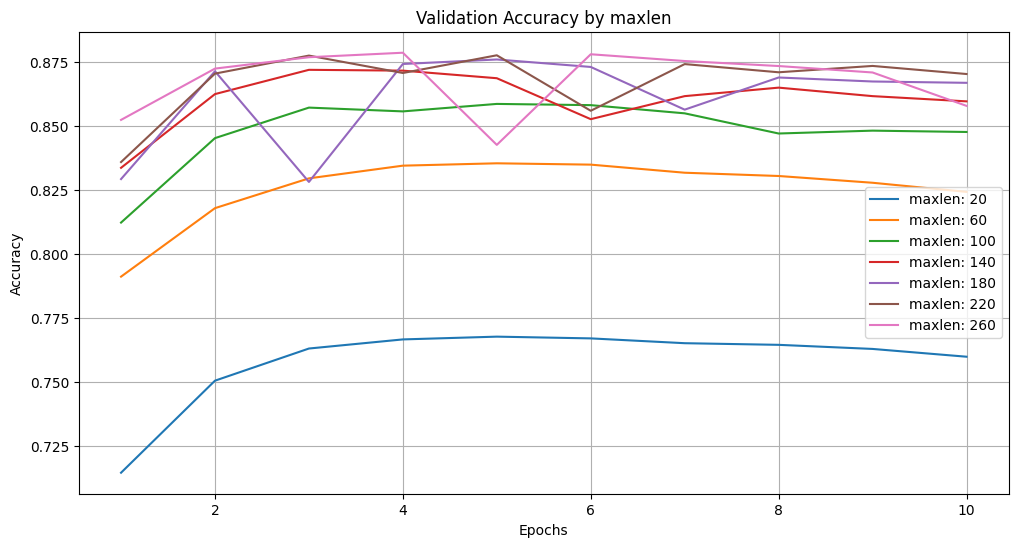

In [2]:
# Task 1 Parameters
maxlen_values = [20, 60, 100, 140, 180, 220, 260]
maxlen_histories = {}

# Load raw data once
(x_train_raw, y_train), (x_test_raw, y_test) = imdb.load_data(num_words=max_features)

print("Starting Task 1: Testing maxlen values...")

for ml in maxlen_values:
    print(f"Training with maxlen = {ml}...")

    # 1. Preprocess data specific to this maxlen
    x_train = preprocessing.sequence.pad_sequences(x_train_raw, maxlen=ml)
    x_test = preprocessing.sequence.pad_sequences(x_test_raw, maxlen=ml)

    # 2. Build Model
    model = Sequential()
    # Note: '8' is the embedding dimension used in the provided docx example
    model.add(Embedding(max_features, 8, input_length=ml))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    # 3. Compile and Fit
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    # Store history for plotting
    maxlen_histories[ml] = history

# 4. Plot and Compare
plot_results(maxlen_histories, "maxlen")

Starting Task 2: Testing embedding dimensions with maxlen=140...
Training with num_layers (output_dim) = 8...
Training with num_layers (output_dim) = 16...
Training with num_layers (output_dim) = 64...
Training with num_layers (output_dim) = 128...


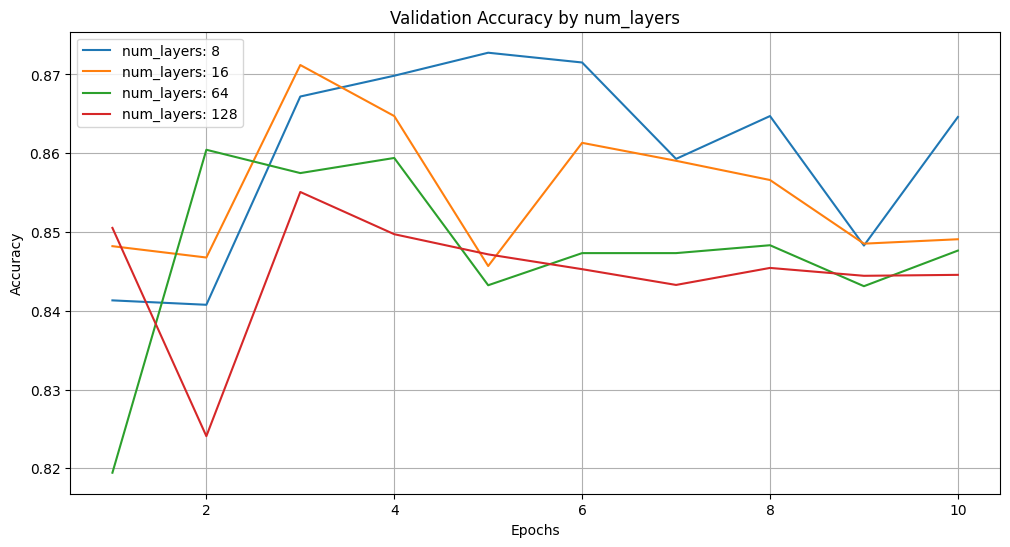

In [3]:
# SET THIS based on Task 1 results (e.g., if 140 was best, change 20 to 140)
best_maxlen = 140

# Task 2 Parameters
# The assignment calls this 'num_layers', but it maps to the Embedding output_dim
layer_values = [8, 16, 64, 128]
layer_histories = {}

# Preprocess data using the best maxlen found previously
x_train = preprocessing.sequence.pad_sequences(x_train_raw, maxlen=best_maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test_raw, maxlen=best_maxlen)

print(f"Starting Task 2: Testing embedding dimensions with maxlen={best_maxlen}...")

for layers in layer_values:
    print(f"Training with num_layers (output_dim) = {layers}...")

    model = Sequential()
    # 'layers' variable here takes the place of 'num_layer' from the original code
    model.add(Embedding(max_features, layers, input_length=best_maxlen))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    layer_histories[layers] = history

# Plot comparison
plot_results(layer_histories, "num_layers")

Starting Task 3: Testing activation functions...
Training with activation = sigmoid...
Training with activation = relu...
Training with activation = tanh...
Training with activation = elu...


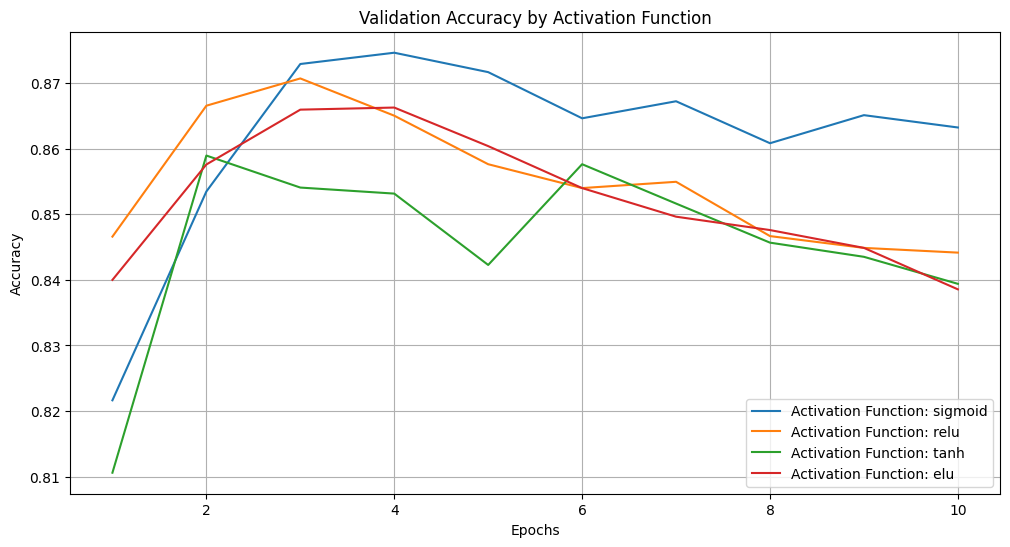

In [4]:
# Task 3 Parameters
activation_functions = ['sigmoid', 'relu', 'tanh', 'elu']
activation_histories = {}

# We use best_maxlen from Task 1 and a chosen layer size (e.g., 8)
current_layers = 8

print("Starting Task 3: Testing activation functions...")

for act in activation_functions:
    print(f"Training with activation = {act}...")

    model = Sequential()
    model.add(Embedding(max_features, current_layers, input_length=best_maxlen))
    model.add(Flatten())
    # Changing the activation of the Dense layer as requested
    model.add(Dense(1, activation=act))

    # Note: Binary crossentropy assumes output is probability (0 to 1).
    # RELU/Tanh might produce poor loss results here, but that is the point of the experiment.
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    activation_histories[act] = history

# Plot comparison
plot_results(activation_histories, "Activation Function")